In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_house = pd.read_csv('kc_house_data.csv')

In [3]:
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

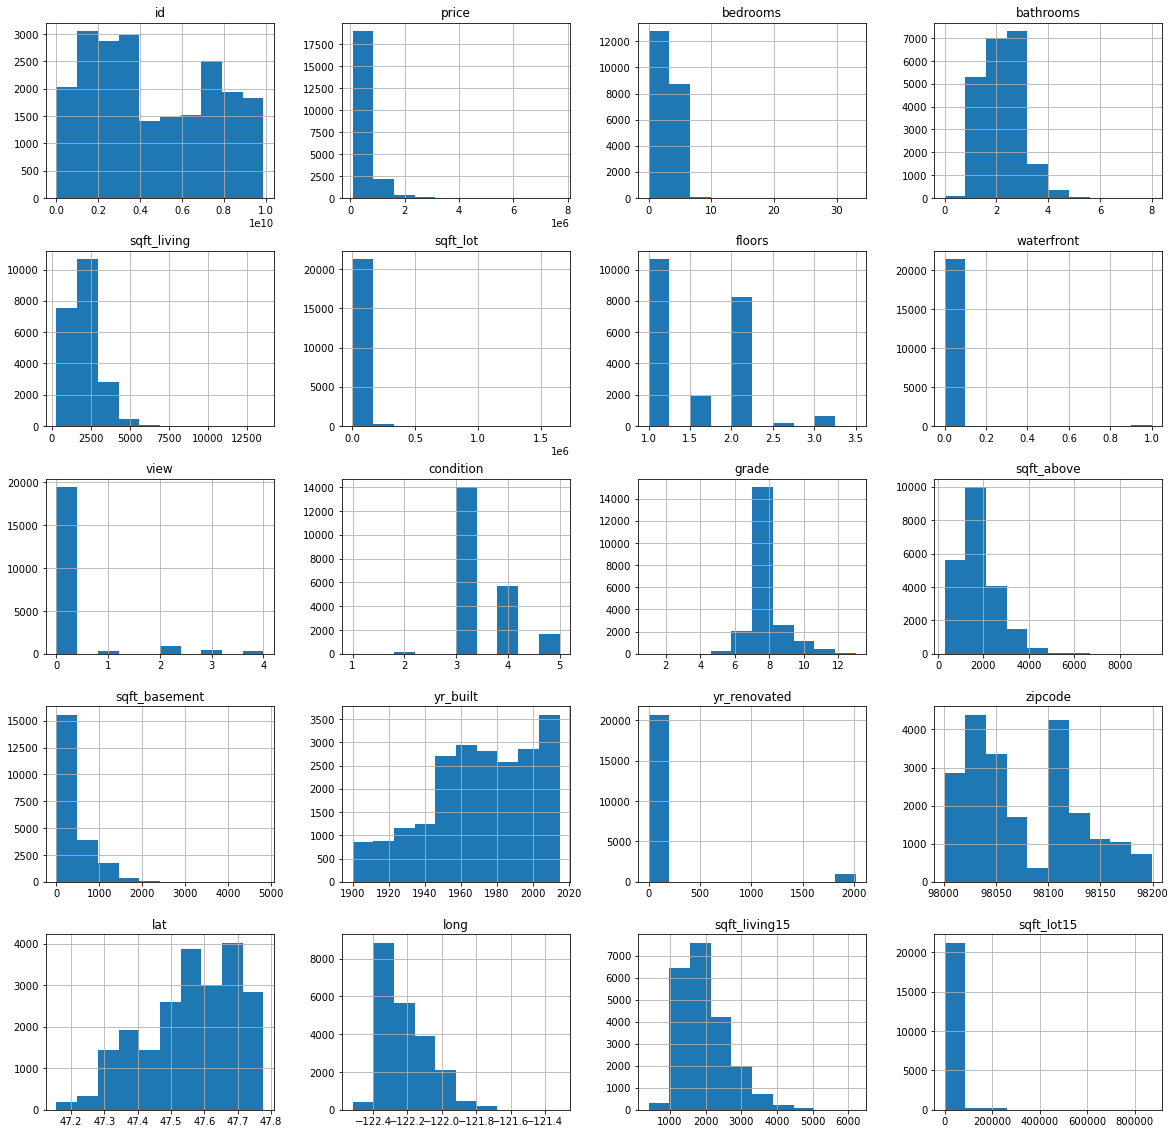

In [4]:
df_house.hist(bins=10, figsize=(20,20))

In [5]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [6]:
X = df_house[selected_features]
y = df_house['price']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

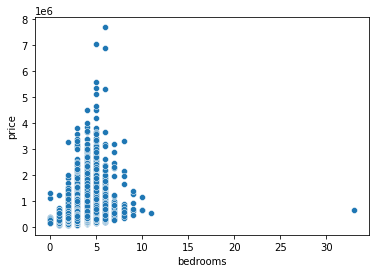

In [7]:
sns.scatterplot('bedrooms', 'price',data=df_house)

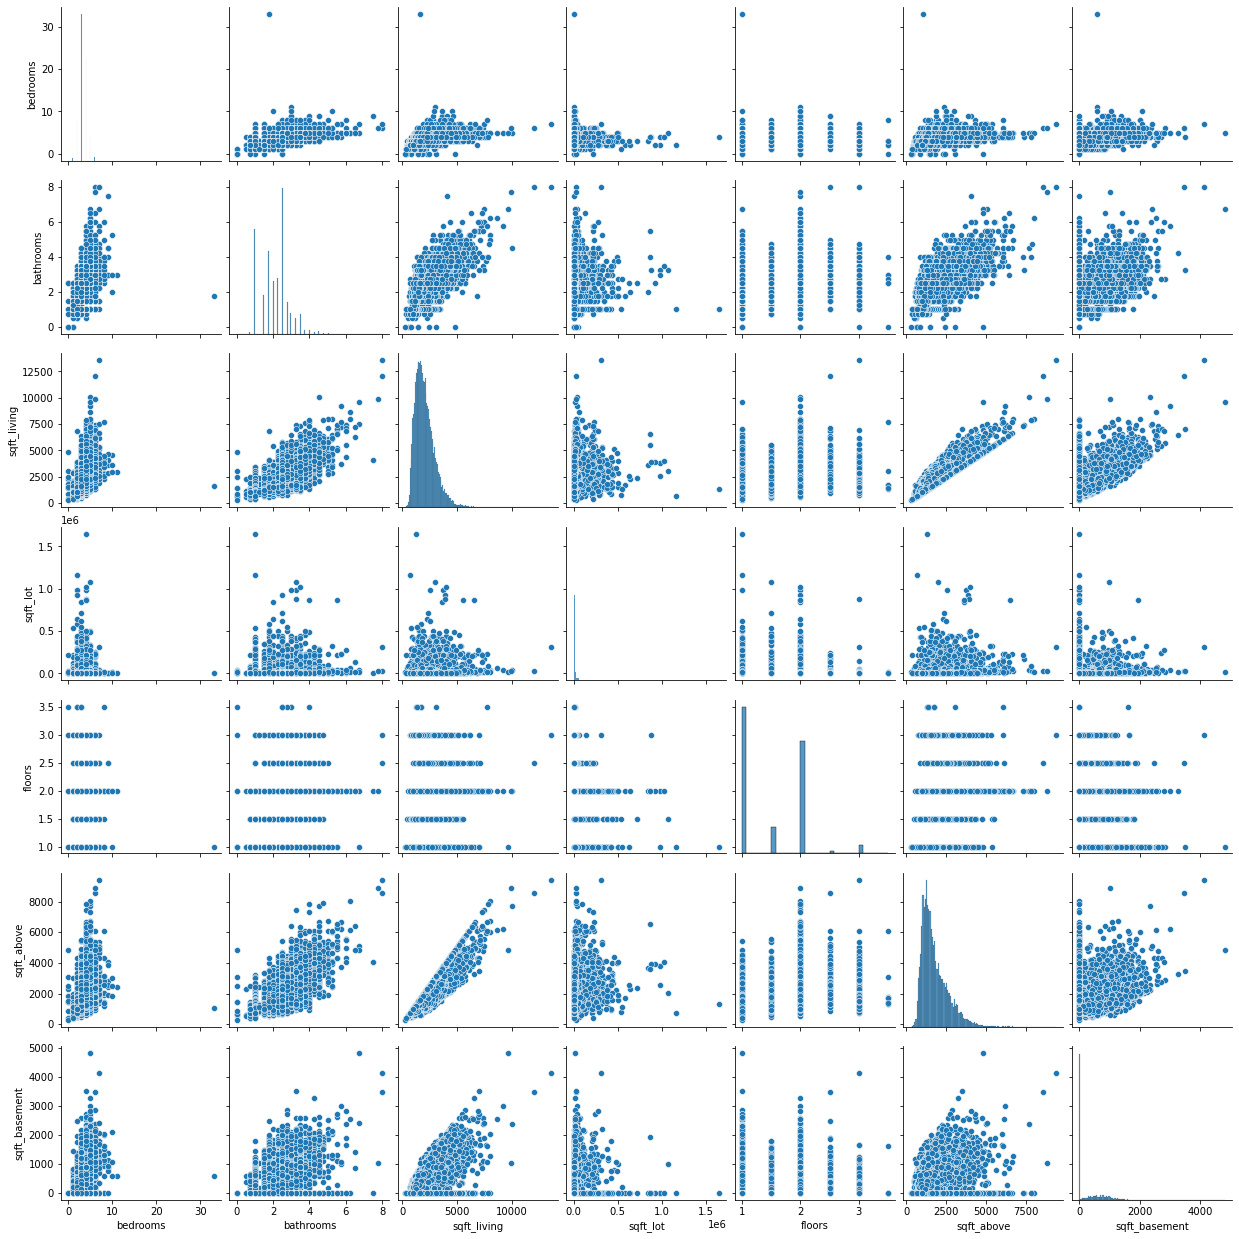

In [8]:
sns.pairplot(data=df_house[selected_features])

In [10]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [11]:
y= y.values.reshape(-1,1)

In [12]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [13]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(X,y)

LinearRegression()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [15]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [16]:
X_scaled.shape

(21613, 7)

In [17]:
scaler.data_max_

array([7700000.])

In [18]:
scaler.data_min_

array([75000.])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_scaled,y_scaled,test_size=0.22, random_state=0)


In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense ,Conv2D,MaxPool2D,AveragePooling2D,Flatten,Dropout
from keras.optimizers import adam
from keras.callbacks import TensorBoard

model = Sequential()
model.add(Dense(100,input_dim= 7, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))


Using TensorFlow backend.


In [21]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               800       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [23]:
epoch_hist= model.fit(X_train,
         y_train,
         epochs=100,
         batch_size=40,
            verbose=1,
           validation_split=0.2
          
         )

Train on 13486 samples, validate on 3372 samples
Epoch 1/100
13486/13486 [==============================] - 0s 32us/step - loss: 0.0013 - val_loss: 9.8957e-04
Epoch 2/100
13486/13486 [==============================] - 0s 22us/step - loss: 0.0011 - val_loss: 9.5627e-04
Epoch 3/100
13486/13486 [==============================] - 0s 22us/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
13486/13486 [==============================] - 0s 22us/step - loss: 0.0011 - val_loss: 9.3498e-04
Epoch 5/100
13486/13486 [==============================] - 0s 22us/step - loss: 0.0010 - val_loss: 9.5378e-04
Epoch 6/100
13486/13486 [==============================] - 0s 22us/step - loss: 0.0011 - val_loss: 9.4593e-04
Epoch 7/100
13486/13486 [==============================] - 0s 22us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/100
13486/13486 [==============================] - 0s 21us/step - loss: 0.0011 - val_loss: 9.9779e-04
Epoch 9/100
13486/13486 [==============================] - 0s 21us/step - loss:

In [24]:
epoch_hist.history.keys()

dict_keys(['val_loss', 'loss'])

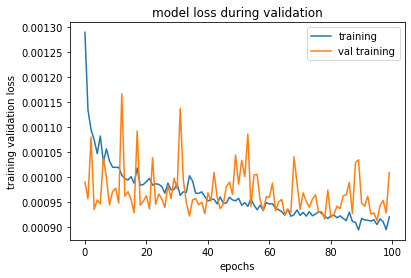

In [25]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('model loss during validation')
plt.xlabel('epochs')
plt.ylabel('training validation loss')
plt.legend(['training', 'val training'])




In [26]:
X_test_1 = np.array([[4,2, 1960, 5000, 1, 2000,5000]])
scaler_1 = MinMaxScaler()


In [27]:
X_test_1 = scaler_1.fit_transform(X_test_1)
y_pred_1 = model.predict(X_test_1)
y_pred_1 = scaler.inverse_transform(y_pred_1)

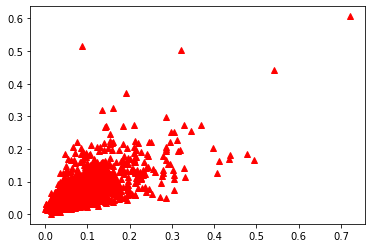

In [28]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, "^", color='r')


In [30]:
y_pred_ori =scaler.inverse_transform(y_pred)
y_test_ori =scaler.inverse_transform(y_test)

(0.0, 3000000.0)

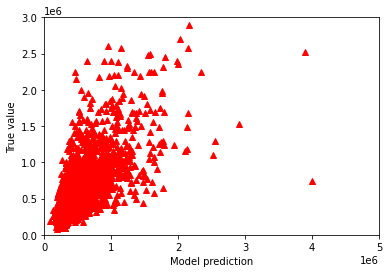

In [31]:
plt.plot(y_pred_ori, y_test_ori, "^", color='r')
plt.xlabel('Model prediction')
plt.ylabel('True value')
plt.xlim(0,5000000)
plt.ylim(0,3000000)



In [33]:
k = X_test.shape[1]
n = len(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMES = float(format(np.sqrt(mean_squared_error(y_pred_ori, y_pred_ori)),'.3f'))
MES = mean_squared_error(y_pred_ori, y_pred_ori)
MAE = mean_absolute_error(y_pred_ori, y_pred_ori)
r2 = r2_score(y_pred_ori, y_pred_ori)
adj_r2 = 1-(1-r2)*(1-n)/(1-k-n)
# MPAE = np.mean(np.abs())

print('RME',RMES,'\nMES',MES, 'MAE',MAE, 'r2',r2, 'ADJ_r2',adj_r2)

RME 0.0 
MES 0.0 MAE 0.0 r2 1.0 ADJ_r2 1.0


In [34]:
print('m',reg.coef_)
print('b',reg.intercept_)

m [[-5.99603456e+04  4.10998225e+03  2.15076760e+02 -3.49197563e-01
   1.13679729e+04  9.16589900e+01  1.23417771e+02]]
b [74563.82945629]
